# Overfitting and Underfitting

Improve performance with extra capacity or early stopping.

## Capacity

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

1. Model Pertama (model):

  * Model ini adalah model neural network yang dibuat menggunakan Keras.
  * Model ini memiliki dua lapisan (layer) Dense (fully connected).
  * Lapisan pertama memiliki 16 unit dengan fungsi aktivasi ReLU (Rectified Linear Unit).
  * Lapisan kedua memiliki 1 unit tanpa fungsi aktivasi (output layer).
  * Model ini cocok untuk masalah regresi karena outputnya adalah nilai kontinu.

2. Model Kedua (wider):

  * Model ini mirip dengan model pertama, tetapi memiliki lapisan pertama yang lebih lebar (32 unit).
  * Lapisan pertama menggunakan fungsi aktivasi ReLU.
  * Lapisan kedua tetap memiliki 1 unit tanpa fungsi aktivasi.

3. Model Ketiga (deeper):

  * Model ini juga memiliki dua lapisan Dense.
  * Lapisan pertama dan kedua masing-masing memiliki 16 unit dengan fungsi aktivasi ReLU.
  * Lapisan ketiga memiliki 1 unit tanpa fungsi aktivasi.


## Early Stopping

### Adding Early Stopping

* EarlyStopping adalah callback yang digunakan selama proses pelatihan (training) model neural network.
* Tujuannya adalah untuk menghentikan pelatihan lebih awal jika tidak ada perbaikan yang signifikan dalam metrik tertentu (misalnya, loss atau akurasi) selama beberapa epoch.
* Parameter yang ditentukan pada kode di bawah:
  * min_delta: Ini adalah perubahan minimum yang dianggap sebagai perbaikan. Jika perubahan lebih kecil dari nilai ini, pelatihan akan dihentikan.
  * patience: Jumlah epoch yang akan ditunggu sebelum menghentikan pelatihan jika tidak ada perbaikan.
  * restore_best_weights: Jika diatur ke True, bobot model akan dikembalikan ke bobot terbaik yang ditemukan selama pelatihan.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

## Example - Train a Model with Early Stopping

Skrip Python ini dirancang untuk mempersiapkan dataset untuk membangun model pembelajaran mesin yang memprediksi kualitas anggur merah. Ini melibatkan membaca dataset, membuat pembagian data latihan dan validasi, penskalaan fitur, dan pemisahan fitur dari variabel target.

Skrip ini dimulai dengan mengimpor pustaka yang diperlukan:

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('./red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


* pandas (sebagai pd): Pustaka manipulasi dan analisis data yang kuat.
* display dari IPython.display: Fungsi untuk menampilkan objek Python dalam format yang lebih kaya.

Di sini, red_wine adalah objek DataFrame yang berisi data dari file 'red-wine.csv'.

Dataset secara acak dibagi menjadi set data latihan dan validasi untuk memastikan model dapat dilatih dan divalidasi pada set data yang berbeda:
* df_train dibuat dengan mengambil sampel 70% data dari red_wine menggunakan sample(frac=0.7, random_state=0), di mana random_state memastikan reproduktibilitas.
* df_valid diperoleh dengan menghapus indeks df_train dari red_wine, memastikan tidak ada tumpang tindih antara data latihan dan validasi.

Penskalaan fitur penting untuk banyak algoritma pembelajaran mesin agar berperforma baik. Di sini, kami menyesuaikan skala fitur ke rentang [0, 1]:
* max_ dan min_ menghitung nilai maksimum dan minimum untuk setiap kolom di df_train.
* Baik df_train maupun df_valid diubah skala menggunakan nilai maksimum dan minimum ini untuk memastikan konsistensi dalam penskalaan.

Akhirnya, fitur dan variabel target ('quality') dipisahkan untuk dataset latihan dan validasi:
* X_train dan X_valid berisi fitur.
* y_train dan y_valid berisi variabel target.

Persiapan ini memungkinkan data untuk dengan mudah digunakan untuk melatih model pembelajaran mesin untuk memprediksi kualitas anggur merah.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

1. Arsitektur Model:
  * Model jaringan saraf dibuat menggunakan Keras.
  * Model ini terdiri dari empat lapisan:
    * Lapisan pertama (Dense) memiliki 512 unit dengan fungsi aktivasi ReLU (Rectified Linear Unit). Lapisan ini mengambil bentuk input dengan 11 fitur.
    * Lapisan kedua dan ketiga juga merupakan lapisan Dense dengan 512 unit masing-masing dan fungsi aktivasi ReLU.
    * Lapisan terakhir adalah lapisan Dense lainnya dengan 1 unit (lapisan output).
  * Arsitektur ini cocok untuk tugas regresi karena outputnya adalah nilai kontinu.

2. Kompilasi:
  * Metode model.compile digunakan untuk mengonfigurasi proses pelatihan.
  * Optimizer Adam ('adam') dan Mean Absolute Error ('mae') dipilih sebagai fungsi loss.
  * Optimizer menyesuaikan bobot model selama pelatihan, dan fungsi loss mengukur perbedaan antara nilai yang diprediksi dan nilai target sebenarnya.


Minimum validation loss: 0.09052654355764389


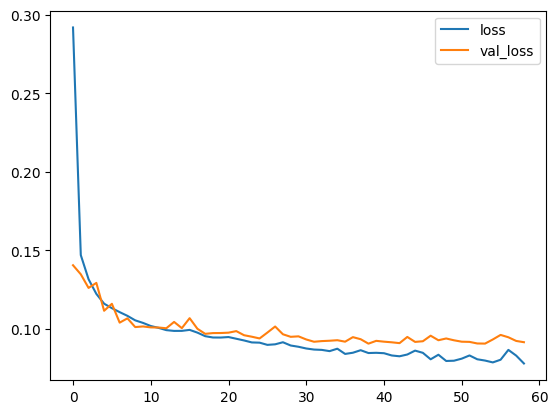

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

1. Pelatihan Model:
  * Metode model.fit digunakan untuk melatih model.
  * Parameter yang digunakan:
    * X_train dan y_train: Data pelatihan (fitur dan target).
    * validation_data: Data validasi (fitur dan target) untuk memantau performa model selama pelatihan.
    * batch_size: Jumlah sampel yang diproses dalam setiap iterasi pelatihan.
    * epochs: Jumlah epoch (iterasi) pelatihan.
    * callbacks: Callback yang digunakan selama pelatihan (dalam hal ini, early_stopping).
    * verbose: Mengatur apakah log pelatihan ditampilkan (dalam hal ini, diatur ke 0 untuk mematikan log).

2. Visualisasi Loss:
  * DataFrame dibuat dari riwayat pelatihan (history_df) yang berisi nilai loss (Mean Absolute Error) pada setiap epoch.
  * Grafik loss pelatihan (loss) dan loss validasi (val_loss) kemudian diplot seiring dengan jumlah epoch.
  * Nilai minimum loss validasi dicetak menggunakan pernyataan print.
